In [1]:
# Import dependencies
from citipy import citipy
import numpy as np
import requests
from config import weather_api_key
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a list to hold city names
cities = []

# Create set of random lat/long combinations
## Temporarily setting this to 10 values to limit the number of calls I'm making to the API
## should be 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)

# Create list of lat/long pairs
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

# Identify the nearest city for each lat/long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)

# Print number of cities
len(cities)

86

In [3]:
# Import time and datetime libraries
import time
from datetime import datetime

In [4]:
# Create a variable to store city data
city_data = []
# Print the beginning of the logging
print("Beginning data retreival")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning data retreival
------------------------


In [5]:
# Create base url to access api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through the cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers with city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increase record count
    record_count += 1
    
    # Run API request for each city
    try:
        # Get JSON Data from query
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If error is experienced, skip city
    except:
        print(f"City -{city}- not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kralendijk
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | sorong
Processing Record 5 of Set 1 | matay
Processing Record 6 of Set 1 | kuching
Processing Record 7 of Set 1 | anahuac
Processing Record 8 of Set 1 | paita
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | jiddah
City -jiddah- not found. Skipping...
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | cortez
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | shakawe
Processing Record 17 of Set 1 | marystown
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | vaitupu
City -vaitupu- not found. Skipping...
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | garowe
Processing Record 23 of Set 1 | na

In [6]:
city_data

[{'City': 'Kralendijk',
  'Lat': 12.15,
  'Lng': -68.2667,
  'Max Temp': 80.58,
  'Humidity': 83,
  'Cloudiness': 20,
  'Wind Speed': 14.97,
  'Country': 'BQ',
  'Date': '2022-06-09 03:35:38'},
 {'City': 'Butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 82.04,
  'Humidity': 70,
  'Cloudiness': 9,
  'Wind Speed': 9.06,
  'Country': 'KI',
  'Date': '2022-06-09 03:35:38'},
 {'City': 'Saint-Philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Max Temp': 66.11,
  'Humidity': 77,
  'Cloudiness': 95,
  'Wind Speed': 13.18,
  'Country': 'RE',
  'Date': '2022-06-09 03:33:58'},
 {'City': 'Sorong',
  'Lat': -0.8833,
  'Lng': 131.25,
  'Max Temp': 82.31,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 5.86,
  'Country': 'ID',
  'Date': '2022-06-09 03:35:39'},
 {'City': 'Matay',
  'Lat': 28.419,
  'Lng': 30.7792,
  'Max Temp': 84.49,
  'Humidity': 27,
  'Cloudiness': 0,
  'Wind Speed': 5.17,
  'Country': 'EG',
  'Date': '2022-06-09 03:35:39'},
 {'City': 'Kuching',
  'Lat': 1.55,


In [7]:
# Create dataframe of the generated values from earlier
city_data_df = pd.DataFrame(city_data)

# Create new column order for dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Preview city_data_df
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kralendijk,BQ,2022-06-09 03:35:38,12.1500,-68.2667,80.58,83,20,14.97
1,Butaritari,KI,2022-06-09 03:35:38,3.0707,172.7902,82.04,70,9,9.06
2,Saint-Philippe,RE,2022-06-09 03:33:58,-21.3585,55.7679,66.11,77,95,13.18
3,Sorong,ID,2022-06-09 03:35:39,-0.8833,131.2500,82.31,79,100,5.86
4,Matay,EG,2022-06-09 03:35:39,28.4190,30.7792,84.49,27,0,5.17


In [8]:
# Create output file
output_data_file = "weather_data/cities.csv"
# Export output file
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Weather Data

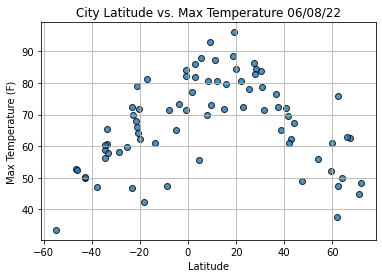

In [9]:
# Create scatter for lat and max temp
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

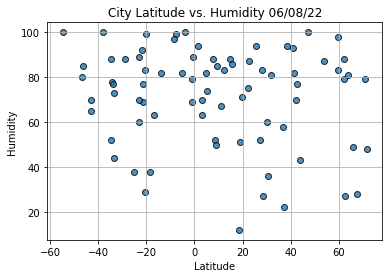

In [10]:
# Create scatter for lat and humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show Plot
plt.show()

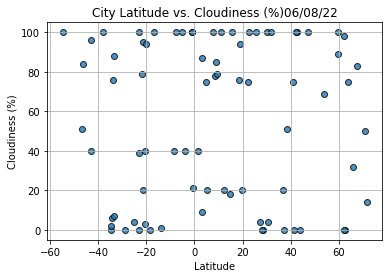

In [11]:
# Create scatter for lat and cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show Plot
plt.show()

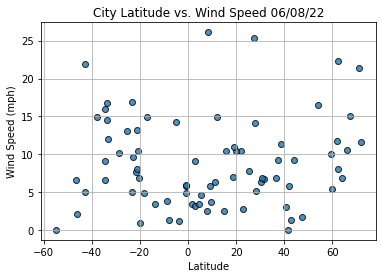

In [12]:
# Create scatter for lat and cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show Plot
plt.show()

In [13]:
# Import linregress
from scipy.stats import linregress

# Create linear regression function to perform analysis on weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coords):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_val, p_val, std_err) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Get equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate text on plot
    plt.annotate(line_eq, text_coords, fontsize=15, color="r")
    plt.title(title),
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lng"] < 0)]

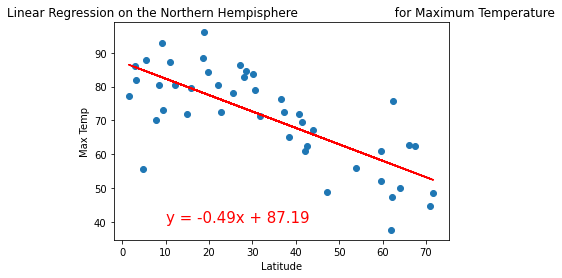

In [15]:
# Northern Hemisphere regression - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for Maximum Temperature', 'Max Temp', (10, 40))

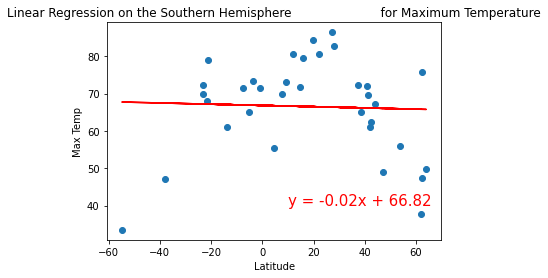

In [16]:
# Southern Hemisphere regression - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10, 40))

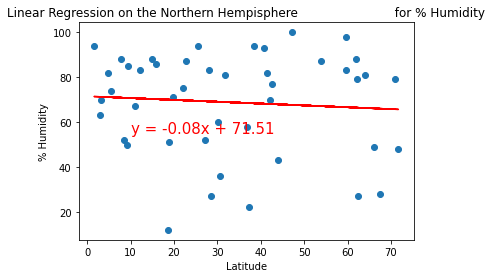

In [17]:
# Northern Hemisphere regression - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for % Humidity', '% Humidity', (10, 55))

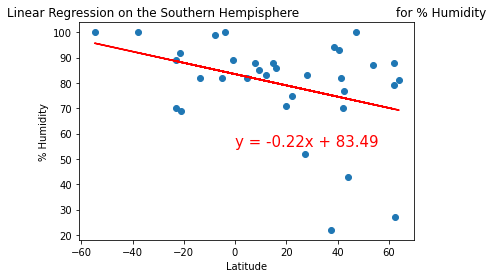

In [18]:
# Southern Hemisphere regression - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \
                        for % Humidity', '% Humidity', (0, 55))

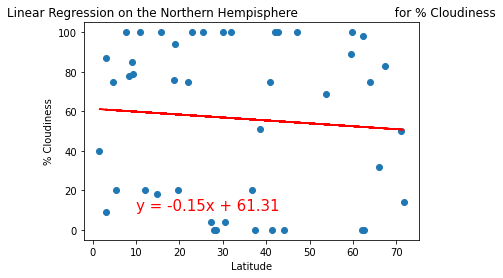

In [19]:
# Northern Hemisphere regression - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for % Cloudiness', '% Cloudiness', (10, 10))

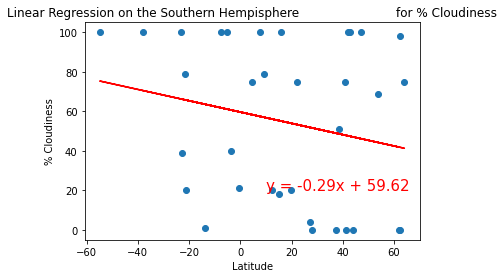

In [20]:
# Southern Hemisphere regression - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \
                        for % Cloudiness', '% Cloudiness', (10, 20))

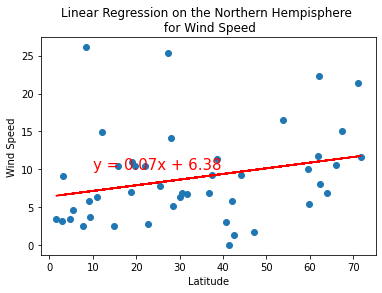

In [21]:
# Northern Hemisphere regression - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \n for Wind Speed', 'Wind Speed', (10, 10))

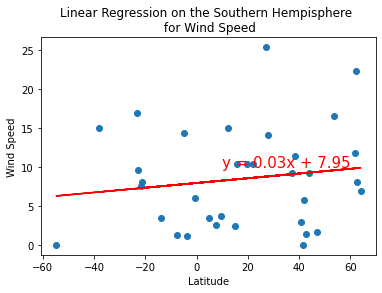

In [22]:
# Northern Hemisphere regression - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \n for Wind Speed', 'Wind Speed', (10, 10))